In [6]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [8]:
iris = datasets.load_iris()
skf = StratifiedKFold(n_splits=10)
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
grid = GridSearchCV(svc, parameters, return_train_score=True)
grid.fit(iris.data, iris.target)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             return_train_score=True)

In [9]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']
    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()


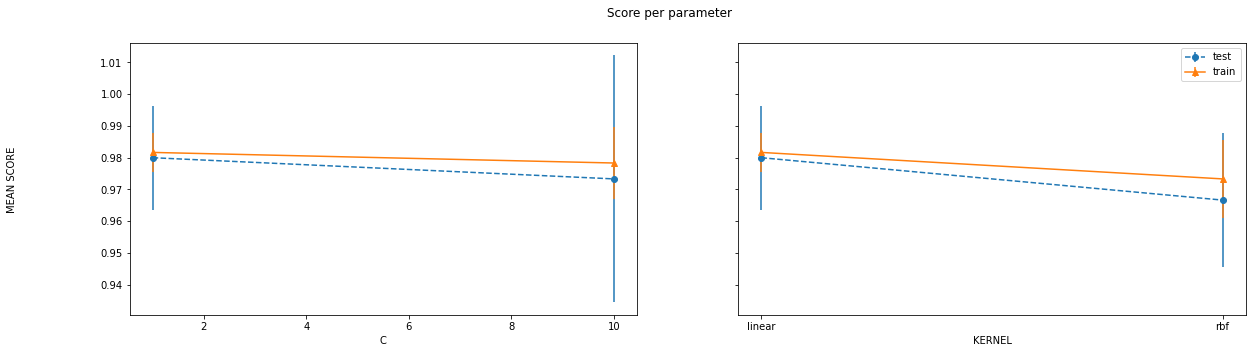

In [10]:
plot_search_results(grid=grid)

In [5]:
grid.cv_results_

{'mean_fit_time': array([0.00218949, 0.0012723 , 0.00039601, 0.00148573]),
 'std_fit_time': array([0.00340496, 0.00208348, 0.00048502, 0.0021573 ]),
 'mean_score_time': array([0.00020032, 0.00020494, 0.0005856 , 0.00019932]),
 'std_score_time': array([0.00040064, 0.00040989, 0.00077432, 0.00039864]),
 'param_C': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'}],
 'split0_test_score': array([0.96666667, 0.96666667, 1.        , 0.96666667]),
 'split1_test_score': array([1.        , 0.96666667, 1.        , 1.        ]),
 'split2_test_score': array([0.96666667, 0.96666667, 0.9       , 0.96666667]),
 'split

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

scores = ["accuracy", "f1", "precision", "recall"]

dt = DecisionTreeClassifier()
param_dict = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range(1,10),
    "min_samples_split": range(2,10),
    "min_samples_leaf": range(2,10)
}

#cv: is the cross-validation, if None default: 5-fold cross-validation
#verbose: controls the verbosity
#njobs: number of jobs to run in parallel: -1 -> using all processors


tree_grid = GridSearchCV(estimator=dt, param_grid=param_dict, cv=10, verbose=1,n_jobs=-1, return_train_score=True)
tree_grid.fit(iris.data, iris.target)

Fitting 10 folds for each of 1152 candidates, totalling 11520 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             return_train_score=True, verbose=1)

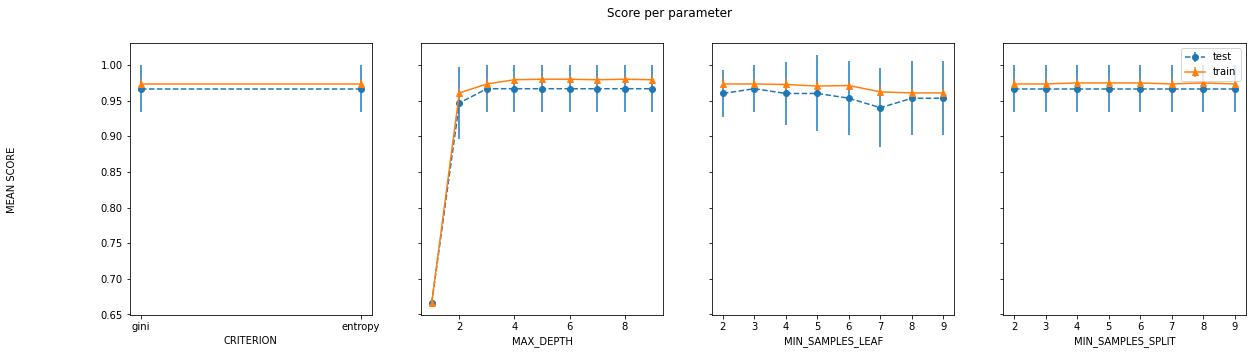

In [19]:
plot_search_results(grid=tree_grid)

In [23]:
tree_grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [64]:
from sklearn.metrics import classification_report
# grid.predict() call predict on the estimator with the best found params
y_pred = tree_grid.predict(iris.data)
classification_result = classification_report(iris.target, y_pred, target_names=iris.target_names, output_dict=True)
print(classification_result)

{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 50}, 'versicolor': {'precision': 0.9791666666666666, 'recall': 0.94, 'f1-score': 0.9591836734693877, 'support': 50}, 'virginica': {'precision': 0.9423076923076923, 'recall': 0.98, 'f1-score': 0.9607843137254902, 'support': 50}, 'accuracy': 0.9733333333333334, 'macro avg': {'precision': 0.9738247863247862, 'recall': 0.9733333333333333, 'f1-score': 0.9733226623982927, 'support': 150}, 'weighted avg': {'precision': 0.9738247863247864, 'recall': 0.9733333333333334, 'f1-score': 0.9733226623982927, 'support': 150}}


<AxesSubplot:>

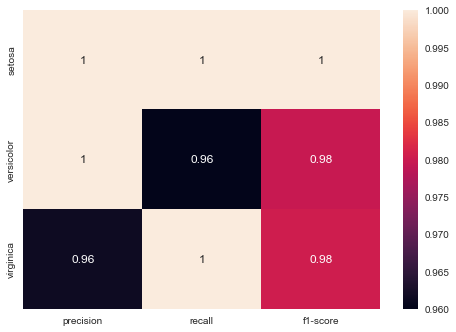

In [69]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame(classification_result)[["setosa", "versicolor", "virginica"]]
sns.heatmap(df.iloc[:-1, :].T, annot=True)

In [24]:
print(tree_grid.best_estimator_)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)


In [25]:
tree_grid.best_score_

0.9666666666666666

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# Initialze the estimators
rf = RandomForestClassifier(random_state=42)
svc = SVC(probability=True, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
gbC = GradientBoostingClassifier(random_state=42)

# Initiaze the hyperparameters for each dictionary
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [rf]

param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param2['classifier'] = [svc]

# Logistic Regression
# param3 = {}
# param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
# param3['classifier__penalty'] = ['l1', 'l2']
# param3['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
# param3['classifier'] = []

param4 = {}
param4['classifier__max_depth'] = [5,10,25,None]
param4['classifier__min_samples_split'] = [2,5,10]
param4['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param4['classifier'] = [dt]

param5 = {}
param5['classifier__n_neighbors'] = [2,5,10,25,50]
param5['classifier'] = [knn]


param7 = {}
param7['classifier__n_estimators'] = [10, 50, 100, 250]
param7['classifier__max_depth'] = [5, 10, 20]
param7['classifier'] = [gbC]

pipeline = Pipeline([('classifier', rf)])
params = [param1, param2, param4, param5, param7]

In [31]:
# Train the grid search model
gs = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, return_train_score=True)
gs.fit(iris.data, iris.target)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(max_depth=5,
                                                               n_estimators=10,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid=[{'classifier': [RandomForestClassifier(max_depth=5,
                                                                n_estimators=10,
                                                                random_state=42)],
                          'classifier__class_weight': [None, {0: 1, 1: 5},
                                                       {0: 1, 1: 10},
                                                       {0: 1, 1: 25}],
                          'classifier__max_depth': [5, 10, 20],
                          'classifier__n_...
                          'classifier__class_weight': [None, {0: 1, 1: 5},
                                                       {0: 1, 1: 10},
                                                       {0: 1, 1: 25}],
                          'classifier__max_depth': [5, 10, 25, None],
                          'classifier__min_samples_split': [2, 5, 10]},
                         {'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': [2, 5, 10, 25, 50]},
                         {'classifier': [GradientBoostingClassifier(random_state=42)],
                          'classifier__max_depth': [5, 10, 20],
                          'classifier__n_estimators': [10, 50, 100, 250]}],
             return_train_score=True)

In [32]:
gs.best_params_

{'classifier': SVC(C=10, probability=True, random_state=42),
 'classifier__C': 10,
 'classifier__class_weight': None}

In [36]:
gs.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_classifier', 'param_classifier__class_weight', 'param_classifier__max_depth', 'param_classifier__n_estimators', 'param_classifier__C', 'param_classifier__min_samples_split', 'param_classifier__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

<AxesSubplot:>

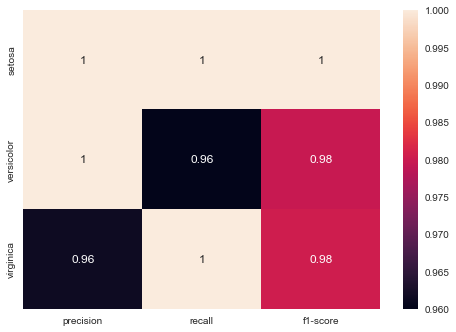

In [68]:
y_pred = gs.predict(iris.data)
classification_result = classification_report(iris.target, y_pred, target_names=iris.target_names, output_dict=True)
df = pd.DataFrame(classification_result)[["setosa", "versicolor", "virginica"]]
sns.heatmap(df.iloc[:-1, :].T, annot=True)